In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__, keras.__version__

('2.20.0', '3.11.3')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
hidden1 = model.layers[1]

In [12]:
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[-0.01095316,  0.06536396,  0.03189839, ..., -0.05359606,
          0.04227781, -0.04903693],
        [-0.0442116 , -0.04403275, -0.02327114, ...,  0.06892511,
         -0.05693195,  0.04139593],
        [-0.01608238,  0.0336253 , -0.04667103, ...,  0.04675046,
         -0.00953791,  0.01004771],
        ...,
        [ 0.03793772, -0.01589968, -0.00387909, ...,  0.02325027,
         -0.0260706 ,  0.04623505],
        [ 0.01503063,  0.00077071,  0.06688368, ...,  0.00862709,
         -0.00874877, -0.01013076],
        [-0.02048672,  0.00473313,  0.06658621, ..., -0.04055187,
          0.01485256, -0.00085901]], shape=(784, 300), dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [15]:
history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.7673 - loss: 0.7119 - val_accuracy: 0.8306 - val_loss: 0.4988
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8307 - loss: 0.4869 - val_accuracy: 0.8418 - val_loss: 0.4735
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8473 - loss: 0.4428 - val_accuracy: 0.8538 - val_loss: 0.4228
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8541 - loss: 0.4182 - val_accuracy: 0.8588 - val_loss: 0.4051
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8609 - loss: 0.3992 - val_accuracy: 0.8596 - val_loss: 0.4041
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.8659 - loss: 0.3832 - val_accuracy: 0.8684 - val_loss: 0.3776
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8698 - loss: 0.3704 - val_accuracy: 0.8726 - val_loss: 0.3588
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.8750 -

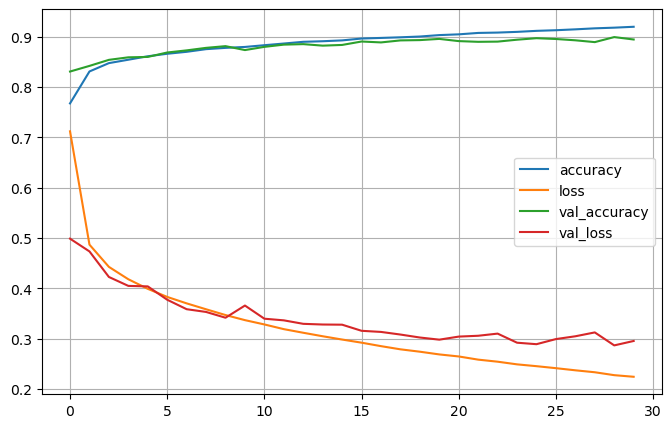

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8433 - loss: 68.1916


[68.19161987304688, 0.8432999849319458]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)   
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'